# Chapter 1  Exploratory data analysis

Anecdotal evidence usually fails, because:
- Small number of observations
- Selection bias
- Confirmation bias
- Inaccuracy

To address the limitations of anecdotes, we will use the tools of statistics, which include:
- Data collection
  - large data
  - valid data
- Descriptive statistics
  - summary statistics
  - visualization
- Exploratory data analysis
  - patterns
  - differences
  - inconsistencies & limitations
- Estimation
  - sample, population
- Hypothesis testing
  - group
  

In [1]:
import matplotlib
import pandas as pd
%matplotlib inline  

## DataFrames

DataFrame is the fundamental data structure provided by pandas. A DataFrame contains a row for each record.

In addition to the data, a DataFrame also contains the variable names and their types, and it provides methods for accessing and modifying the data.

We can easily access the data frame and its columns with scripts intthe  https://github.com/AllenDowney/ThinkStats2 repo.

In [2]:
import nsfg
df = nsfg.ReadFemPreg()
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [3]:
pregordr = df['pregordr']
pregordr[2:5]

2    1
3    2
4    3
Name: pregordr, dtype: int64

## Exercise 1

Print value counts for <tt>birthord</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611933)

In [4]:
birthord_counts = df.birthord.value_counts().sort_index()
birthord_counts

1     4413
2     2874
3     1234
4      421
5      126
6       50
7       20
8        7
9        2
10       1
Name: birthord, dtype: int64

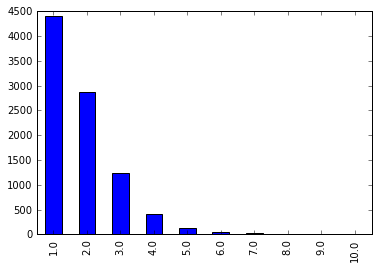

In [5]:
birthord_counts.plot(kind='bar')

Print value counts for <tt>prglngth</tt> and compare to results published in the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=PREG&section=A&subSec=8016&srtLabel=611931)

In [6]:
df['prglngth_cut'] = pd.cut(df.prglngth,bins=[0,13,26,50])
df.prglngth_cut.value_counts().sort_index()


(0, 13]     3507
(13, 26]     793
(26, 50]    9278
dtype: int64

Compute the mean birthweight.

In [7]:
df.totalwgt_lb.mean()

7.2656284576233681

Create a new column named <tt>totalwgt_kg</tt> that contains birth weight in kilograms.  Compute its mean.  Remember that when you create a new column, you have to use dictionary syntax, not dot notation.

In [8]:
df['totalwgt_kg'] = 0.45359237 * df.totalwgt_lb
df.totalwgt_kg.mean()

3.2956336316328279

One important note: when you add a new column to a DataFrame, you must use dictionary syntax, like this
```python
# CORRECT
df['totalwgt_lb'] = df.birthwgt_lb + df.birthwgt_oz / 16.0 
```
Not dot notation, like this:
```python
# WRONG!
df.totalwgt_lb = df.birthwgt_lb + df.birthwgt_oz / 16.0 
```
The version with dot notation adds an attribute to the DataFrame object, but that attribute is not treated as a new column.

Create a boolean Series.

In [9]:
lve_birth = df.outcome == 1
lve_birth.tail()

13588     True
13589    False
13590    False
13591     True
13592     True
Name: outcome, dtype: bool

Use a boolean Series to select the records for the pregnancies that ended in live birth.

In [10]:
live = df[df.outcome == 1]
len(live)

9148

Count the number of live births with <tt>birthwgt_lb</tt> between 0 and 5 pounds (including both).  The result should be 1125.

In [11]:
len(live[(0<=live.birthwgt_lb) & (live.birthwgt_lb<=5)])

1125

Count the number of live births with <tt>birthwgt_lb</tt> between 9 and 95 pounds (including both).  The result should be 798 

In [12]:
len(live[(9<=live.birthwgt_lb) & (live.birthwgt_lb<95)])

798

Use <tt>birthord</tt> to select the records for first babies and others.  How many are there of each?

In [13]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
len(firsts), len(others)

(4413, 4735)

Compute the mean weight for first babies and others.

In [14]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.3258556149732623)

Compute the mean <tt>prglngth</tt> for first babies and others.  Compute the difference in means, expressed in hours.

In [15]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.600951733514613, 38.522914466737063)

## Exercise 2

In [16]:
import thinkstats2
resp = thinkstats2.ReadStataDct('2002FemResp.dct').ReadFixedWidth('2002FemResp.dat.gz', compression='gzip')

In [17]:
preg = nsfg.ReadFemPreg()
preg_map = nsfg.MakePregMap(preg)

In [18]:
for index, pregnum in resp.pregnum.iteritems():
        caseid = resp.caseid[index]
        indices = preg_map[caseid]

        # check that pregnum from the respondent file equals
        # the number of records in the pregnancy file
        if len(indices) != pregnum:
            print(caseid, len(indices), pregnum)
            break


## Glossary
- **anecdotal evidence**: Evidence, often personal, that is collected casually rather than by a well-designed study.
- **population**: A group we are interested in studying. “Population” often refers to a group of people, but the term is used for other subjects, too.
- **cross-sectional study**: A study that collects data about a population at a particular point in time.
- **cycle**: In a repeated cross-sectional study, each repetition of the study is called a cycle.
- **longitudinal study**:: A study that follows a population over time, collecting data from the same group repeatedly.
- **record**: In a dataset, a collection of information about a single person or other subject.
- **respondenv**: A person who responds to a survey.
- **sample**: The subset of a population used to collect data.
- **representative**: A sample is representative if every member of the population has the same chance of being in the sample.
- **oversampling**: The technique of increasing the representation of a sub-population in order to avoid errors due to small sample sizes.
- **raw data**: Values collected and recorded with little or no checking, calculation or interpretation.
- **recode**: A value that is generated by calculation and other logic applied to raw data.
- **data cleaning**: Processes that include validating data, identifying errors, translating between data types and representations, etc.

## Public Data
Governments are good sources because data from public research is often freely available.
Good places to start include:
- http://www.data.gov/
- http://www.science.gov/
- http://data.gov.uk/

Two of book auther's favorite data sets are:
- General Social Survey http://www3.norc.org/gss+website/
- European Social Survey  http://www.europeansocialsurvey.org/

